In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
from mpl_toolkits.basemap import Basemap
path_vs_cnn_USA          =  '../scriptsUSA/vs_cnn/'
path_vs_cnn_USATibet     =  '../scriptsUSATibet/vs_cnn/'
path_vs_sws              =  './data/vs_sws_China/'
os.system('test -d Figs_vs || mkdir Figs_vs')
os.system('rm -rf  layers_vs && mkdir layers_vs')
periods = np.array([8,10,12,14,16,18,20,22,24,26,28,30,32,35,40,45,50])
# depth = np.array([0,3,10,15,20,30,40,60,80,100,120,150])
depth = np.array([10,40,100])
count = 0
lay1 = [];lay2 = [];lay3 = [];lay4 = [];lay5 = [];lay6 = [];lay7 = [];
lay8 = [];lay9 = [];lay10 = [];lay11 = [];lay12 = [];lay13 = [];
filenames=os.listdir(path_vs_sws)
with open('./data/select.point','r') as f:
    chinaNames=f.read().splitlines()
for key_name in chinaNames:
    lon,lat=key_name.split()
    key_name = lat+"_"+lon+'.txt'
    file_vs_sws = path_vs_sws + key_name
    file_vs_USA      = path_vs_cnn_USA + key_name
    file_vs_USATibet = path_vs_cnn_USATibet + key_name
    
    if  os.path.exists(file_vs_sws) and os.path.exists(file_vs_USA) and os.path.exists(file_vs_USATibet):
        count =count +1
        temp_sws = np.loadtxt(file_vs_sws);
        temp_cnn_USA = np.loadtxt(file_vs_USA);
        temp_cnn_USATibet= np.loadtxt(file_vs_USATibet);
        if len(temp_sws)>=1 and len(temp_cnn_USA)>=1 and len(temp_cnn_USATibet)>=1:
            depth_sws = temp_sws[:,0];vs_sws = temp_sws[:,1]
            depth_cnn_USA = temp_cnn_USA[:,0]
            vs_cnn_USA = temp_cnn_USA[:,1]
            depth_cnn_USATibet=temp_cnn_USATibet[:,0]
            vs_cnn_USATibet=temp_cnn_USATibet[:,1]
            
            fl_sws = interp1d(depth_sws, vs_sws, kind='slinear')
            fl_cnn_USA = interp1d(depth_cnn_USA, vs_cnn_USA, kind='slinear')
            fl_cnn_USATibet=interp1d(depth_cnn_USATibet, vs_cnn_USATibet, kind='slinear')
            vs_sws = fl_sws(depth)
            vs_cnn_USA = fl_cnn_USA(depth); 
            vs_cnn_USATibet = fl_cnn_USATibet(depth); 
            if count%1000==0:
                print(count,key_name)
            lon = float(lon);lat=float(lat)
            lay1.append([lon,lat,vs_sws[0],vs_cnn_USA[0],vs_cnn_USATibet[0]])
            lay2.append([lon,lat,vs_sws[1],vs_cnn_USA[1],vs_cnn_USATibet[1]])
            lay3.append([lon,lat,vs_sws[2],vs_cnn_USA[2],vs_cnn_USATibet[2]])
#             lay4.append([lon,lat,vs_sws[3],vs_cnn_USA[3],vs_cnn_USATibet[3]])
#             lay5.append([lon,lat,vs_sws[4],vs_cnn_USA[4],vs_cnn_USATibet[4]])
#             lay6.append([lon,lat,vs_sws[5],vs_cnn_USA[5],vs_cnn_USATibet[5]])
#             lay7.append([lon,lat,vs_sws[6],vs_cnn_USA[6],vs_cnn_USATibet[6]])
#             lay8.append([lon,lat,vs_sws[7],vs_cnn_USA[7],vs_cnn_USATibet[7]])
#             lay9.append([lon,lat,vs_sws[8],vs_cnn_USA[8],vs_cnn_USATibet[8]])
#             lay10.append([lon,lat,vs_sws[9],vs_cnn_USA[9],vs_cnn_USATibet[9]])
#             lay11.append([lon,lat,vs_sws[10],vs_cnn_USA[10],vs_cnn_USATibet[10]])
#             lay12.append([lon,lat,vs_sws[11],vs_cnn_USA[11],vs_cnn_USATibet[11]])
print(path_vs_sws)
print(count)

1000 32.00_117.00.txt
2000 39.00_92.50.txt
3000 45.50_88.00.txt
./data/vs_sws_China/
3260


In [25]:
lay1=np.array(lay1);np.savetxt('./layers_vs/lay1.txt',lay1,fmt="%10.5f")
lay2=np.array(lay2);np.savetxt('./layers_vs/lay2.txt',lay2,fmt="%10.5f")
lay3=np.array(lay3);np.savetxt('./layers_vs/lay3.txt',lay3,fmt="%10.5f")
# lay4=np.array(lay4);np.savetxt('./layers_vs/lay4.txt',lay4,fmt="%10.5f")
# lay5=np.array(lay5);np.savetxt('./layers_vs/lay5.txt',lay5,fmt="%10.5f")
# lay6=np.array(lay6);np.savetxt('./layers_vs/lay6.txt',lay6,fmt="%10.5f")
# lay7=np.array(lay7);np.savetxt('./layers_vs/lay7.txt',lay7,fmt="%10.5f")
# lay8=np.array(lay8);np.savetxt('./layers_vs/lay8.txt',lay8,fmt="%10.5f")
# lay9=np.array(lay9);np.savetxt('./layers_vs/lay9.txt',lay9,fmt="%10.5f")
# lay10=np.array(lay10);np.savetxt('./layers_vs/lay10.txt',lay10,fmt="%10.5f")
# lay11=np.array(lay11);np.savetxt('./layers_vs/lay11.txt',lay11,fmt="%10.5f")
# lay12=np.array(lay12);np.savetxt('./layers_vs/lay12.txt',lay12,fmt="%10.5f")
# before run the cell, please run the matlab script "MainSmoothResults.m" to smooth the results and plot.
os.system("matlab -nojvm -nodisplay -nosplash -nodesktop < MainSmoothResults.m")
print("ending matlab")

ending matlab


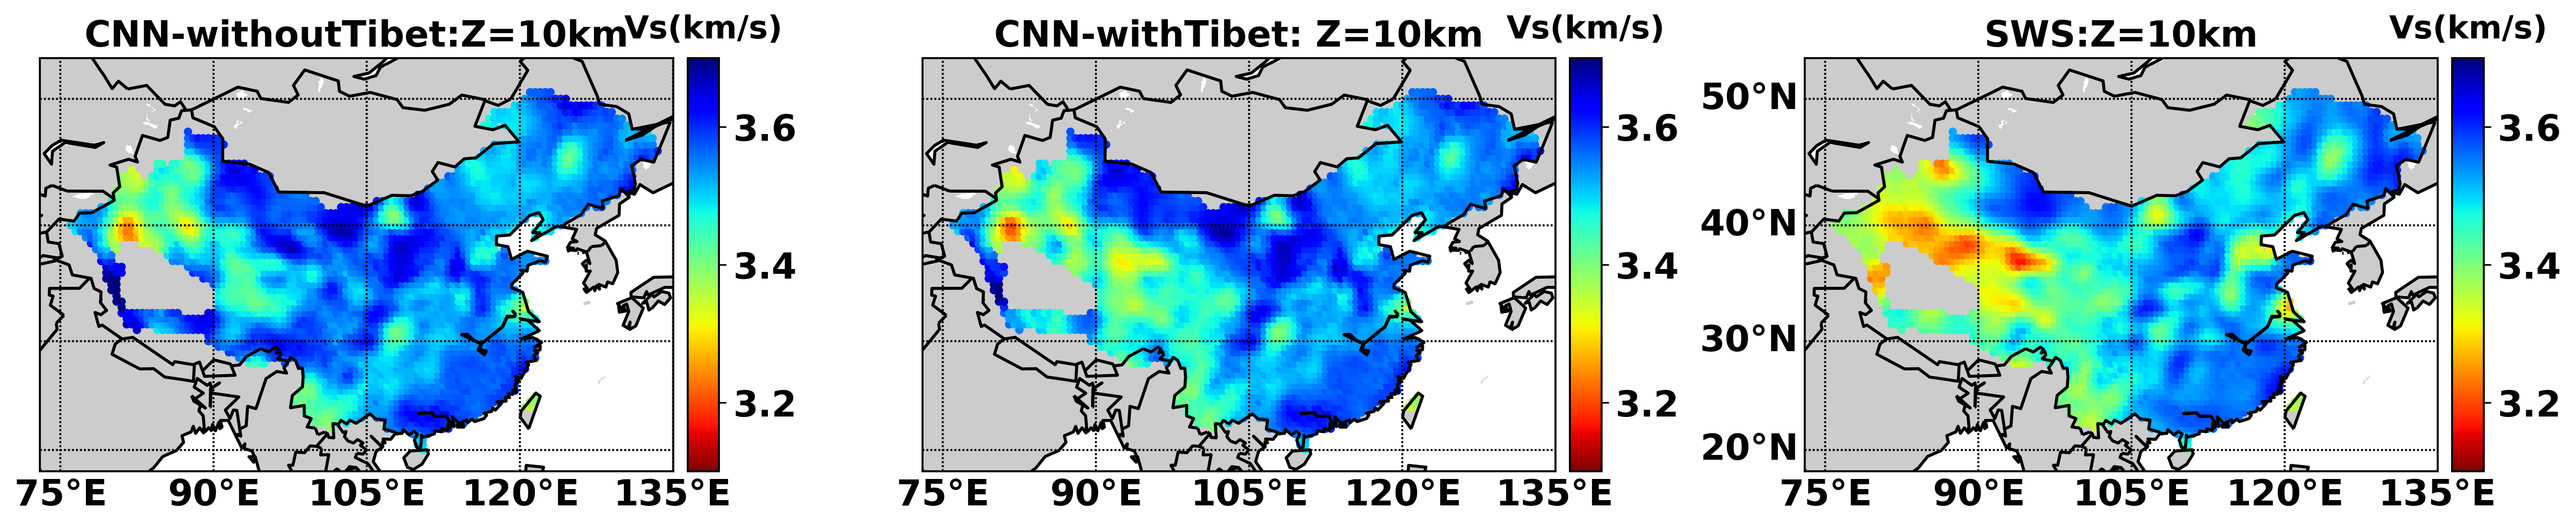

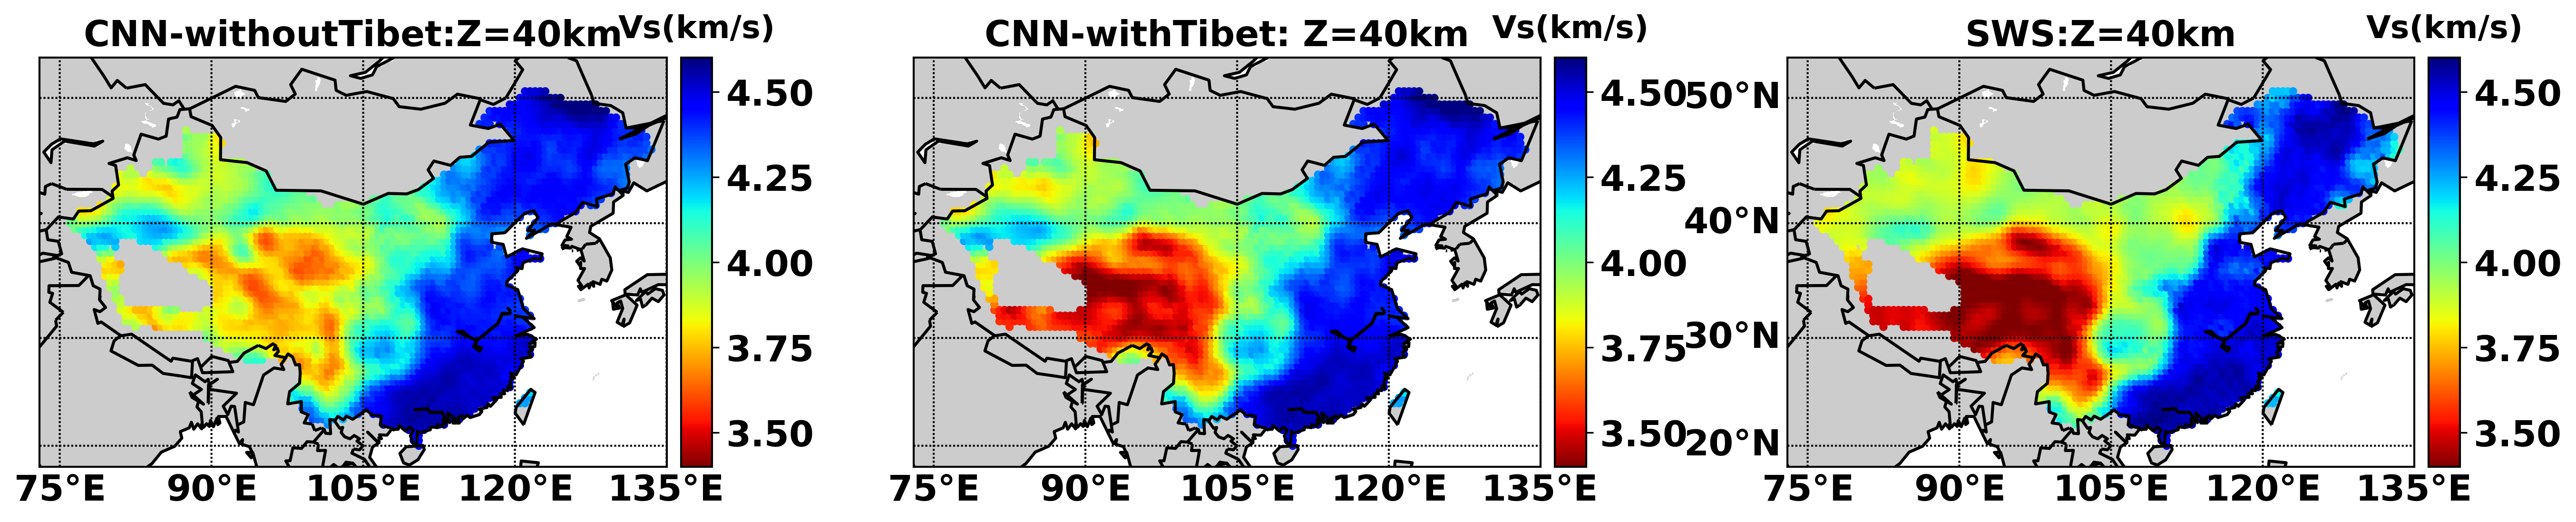

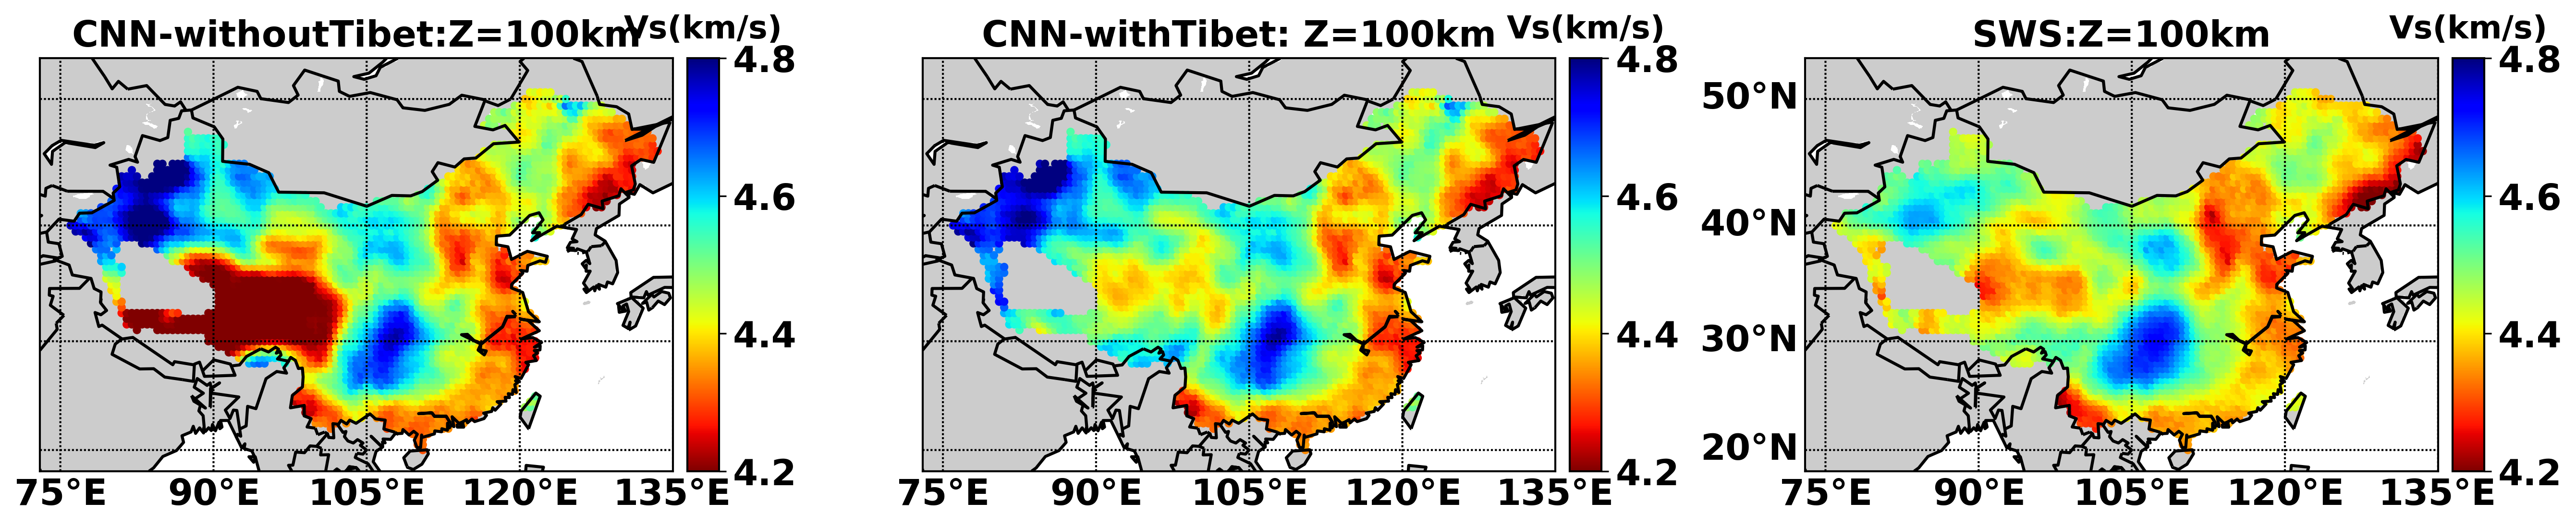

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
from mpl_toolkits.basemap import Basemap


lay1=np.loadtxt('./layers_vs/lay1.txt')
lay2=np.loadtxt('./layers_vs/lay2.txt')
lay3=np.loadtxt('./layers_vs/lay3.txt')
# lay4=np.loadtxt('./layers_vs/lay4.txt')
# lay5=np.loadtxt('./layers_vs/lay5.txt')
# lay6=np.loadtxt('./layers_vs/lay6.txt')
# lay7=np.loadtxt('./layers_vs/lay7.txt')
# lay8=np.loadtxt('./layers_vs/lay8.txt')
# lay9=np.loadtxt('./layers_vs/lay9.txt')
# lay10=np.loadtxt('./layers_vs/lay10.txt')
# lay11=np.loadtxt('./layers_vs/lay11.txt')



all_lyers = [lay1,lay2,lay3]#,lay4,lay5,lay6,lay7,lay8,lay9,lay10,lay11];
count=0
#cm=[[2.0,3.6],[2.5,3.5],[3.1,3.7],[3.2,3.8],[3.2,3.9],[3.2,4.2],[3.4,4.6],[3.7,4.6],[4.15,4.7],[4.2,4.8],[4.05,4.75],[4.1,4.8],[4.1,4.7]]
#     0         3         10         15       20        30          40       3.6 60   80         100      120      150       180
cm=[[3.1,3.7] ,[3.4,4.6],[4.2,4.8]]

pad=80
scale=0.3
fontsize=18
for ilay in range(len(all_lyers)):
    layer = all_lyers[ilay] 
    lon,lat=layer[:,0],layer[:,1]
    layer_sws=layer[:,2]
    layer_cnn_USA=layer[:,3]
    layer_cnn_USATibet=layer[:,4]
    count =count+1
    fig=plt.figure(count,figsize=(18,10))
    ax = plt.subplot(1,3,3)
    m = Basemap(projection='mill', llcrnrlon=73, llcrnrlat=18, urcrnrlon=135,
            urcrnrlat=53)
    m.drawcountries(linewidth=1.5)
    m.drawcoastlines(linewidth=1.5)
    m.drawlsmask(land_color="0.8", ocean_color="w", lsmask=None, lsmask_lons=None, 
                 lsmask_lats=None, lakes=True, grid=1.25)
    x_sws,y_sws = m(lon,lat)
    z_sws = layer_sws[:]
    sc=plt.scatter(x_sws,y_sws,c=z_sws,s=10,cmap='jet_r',marker='o')
    ax.set_title('SWS:Z='+str(depth[count-1])+'km',fontsize=fontsize)
    # draw parallels
    m.drawparallels(np.arange(10,90,10),labels=[1,0,0,1],fontsize=fontsize)
    # draw meridians
    m.drawmeridians(np.arange(-180,180,15),labels=[1,1,0,1],fontsize=fontsize)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb=plt.colorbar(sc, cax=cax)
#     cb.set_label(label="Vs(km/s)",size=fontsize, labelpad=-20)
    cb.ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cb.ax.set_title('Vs(km/s)',fontsize=fontsize-2,pad=10)
# #     cb=plt.colorbar(sc,shrink=scale)
# #     cb.ax.get_yaxis().labelpad =pad
    plt.clim(cm[count-1])
    
    ax = plt.subplot(1,3,1) 
    m = Basemap(projection='mill', llcrnrlon=73, llcrnrlat=18, urcrnrlon=135,
            urcrnrlat=53)
    m.drawcountries(linewidth=1.5)
    m.drawcoastlines(linewidth=1.5)
    m.drawlsmask(land_color="0.8", ocean_color="w", lsmask=None, lsmask_lons=None, 
                 lsmask_lats=None, lakes=True, grid=1.25)
    x_cnn,y_cnn = m(lon,lat)
    vs_cnn_USA = layer_cnn_USA[:] 
    sc=plt.scatter(x_cnn,y_cnn,c=vs_cnn_USA,s=10,cmap='jet_r',marker='o')
    ax.set_title('CNN-withoutTibet:Z='+str(depth[count-1])+'km',fontsize=fontsize)
    # draw parallels
    m.drawparallels(np.arange(10,90,10),labels=[0,0,0,0],fontsize=fontsize)
    # draw meridians
    m.drawmeridians(np.arange(-180,180,15),labels=[1,1,0,1],fontsize=fontsize)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb=plt.colorbar(sc, cax=cax)
#     cb.set_label(label="Vs(km/s)",size=fontsize, labelpad=-20)
    cb.ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cb.ax.set_title('Vs(km/s)',fontsize=fontsize-2,pad=10)   
# #     cb=plt.colorbar(sc,shrink=scale)
# #     cb.ax.get_yaxis().labelpad =pad
    plt.clim(cm[count-1])
#     cb=plt.colorbar(sc,shrink=scale)
#     cb.ax.set_title('Vs(km/s)',fontsize=fontsize)
#     cb.ax.get_yaxis().labelpad =pad
#     cb.ax.tick_params(axis='both', which='major', labelsize=fontsize)
#     plt.clim(cm[count-1])
    
    ax = plt.subplot(1,3,2) 
    m = Basemap(projection='mill', llcrnrlon=73, llcrnrlat=18, urcrnrlon=135,
            urcrnrlat=53)
    m.drawcountries(linewidth=1.5)
    m.drawcoastlines(linewidth=1.5)
    m.drawlsmask(land_color="0.8", ocean_color="w", lsmask=None, lsmask_lons=None, 
                 lsmask_lats=None, lakes=True, grid=1.25)
    x_cnn,y_cnn = m(lon,lat)
    vs_cnn_USATibet = layer_cnn_USATibet[:]
    sc=plt.scatter(x_cnn,y_cnn,c=vs_cnn_USATibet,s=10,cmap='jet_r',marker='o')
    ax.set_title('CNN-withTibet: Z='+str(depth[count-1])+'km',fontsize=fontsize)
    # draw parallels
    m.drawparallels(np.arange(10,90,10),labels=[0,0,0,0],fontsize=fontsize)
    # draw meridians
    m.drawmeridians(np.arange(-180,180,15),labels=[1,1,0,1],fontsize=fontsize)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cb=plt.colorbar(sc, cax=cax)
#     cb.set_label(label="Vs(km/s)",size=fontsize, labelpad=-20)
    cb.ax.tick_params(axis='both', which='major', labelsize=fontsize)
    cb.ax.set_title('Vs(km/s)',fontsize=fontsize-2,pad=10)
#     cb=plt.colorbar(sc,shrink=scale)
#     cb.ax.set_title('dVs(km/s)',fontsize=fontsize)
#     cb.ax.get_xaxis().labelpad =pad
#     cb.ax.tick_params(axis='both', which='major', labelsize=fontsize)
    plt.clim(cm[count-1])
    plt.tight_layout()
    plt.savefig( './Figs_vs/Vs_'+str(depth[count-1])+'.jpg',bbox_inches='tight',dpi=300) 
    plt.pause(0.1)
    fig.clear()